In [2]:
!pip install matplotlib

   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 7.8/7.8 MB 68.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 63.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 2.6/2.6 MB 74.3 MB/s eta 0:00:00


In [3]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

In [4]:
audio_path = '../data/processed/rock_highoctane_0.wav'
y, sr = librosa.load(audio_path)

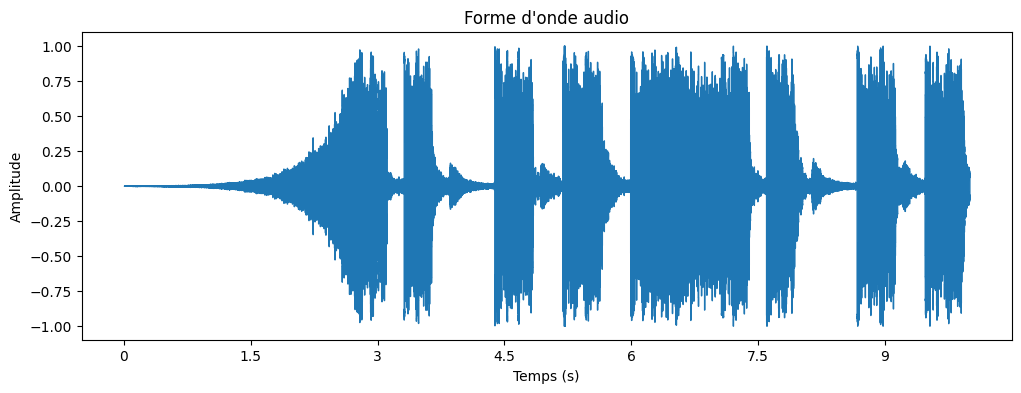

In [5]:
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('Forme d\'onde audio')
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.show()

In [7]:
import numpy as np

def extract_features(audio_file):
  """
  Extrait les caractéristiques audio d'un fichier.

  Args:
    audio_file (str): Chemin vers le fichier audio.

  Returns:
    dict: Dictionnaire contenant les caractéristiques extraites.
  """

  y, sr = librosa.load(audio_file)

  # Calculer les MFCCs
  mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

  # Calculer les chroma features
  chroma = librosa.feature.chroma_stft(y=y, sr=sr)

  # Estimer le tempo
  tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)

  # Calculer le Zero-Crossing Rate
  zcr = librosa.feature.zero_crossing_rate(y)

  # Stocker les caractéristiques dans un dictionnaire
  data = {
      'mfccs': mfccs.flatten(),
      'chroma': chroma.flatten(),
      'tempo': tempo,
      'zcr': np.mean(zcr),
      'genre': 'rock'  # Remplacez par le genre réel
  }

  return data

# Exemple d'utilisation
features = extract_features(audio_path)
features

{'mfccs': array([-490.68057  , -490.68057  , -490.68057  , ...,    2.6678066,
           1.569474 ,   -2.4529755], dtype=float32),
 'chroma': array([1.        , 0.9777126 , 0.6204476 , ..., 0.5764472 , 0.82327414,
        0.6982495 ], dtype=float32),
 'tempo': array([112.34714674]),
 'zcr': np.float64(0.1590097520301624),
 'genre': 'rock'}